### Dummy model predicting the mean of total chargers so I have a baseline of good scores to reference

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
df = pd.read_csv('EV Station Implementations_US.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [14]:
# remove spaces
df.columns = df.columns.str.replace(' ','').str.lower()

In [15]:
df.city.nunique()

5412

In [9]:
df.city.value_counts()

Los Angeles         406
San Diego           279
New York            271
Atlanta             249
Phoenix             234
Austin              229
San Francisco       197
Houston             196
Seattle             189
Kansas City         179
Portland            173
Chicago             167
Orlando             165
Las Vegas           154
Baltimore           150
Dallas              149
San Jose            144
Washington          138
Honolulu            131
Sacramento          131
Columbus            123
San Antonio         123
Nashville           118
Dearborn            117
Irvine              115
Denver              104
Indianapolis        102
Raleigh              97
Springfield          96
Santa Clara          95
                   ... 
Wilmington            1
Metter                1
McGaheysville         1
Lighthouse Point      1
Avoca                 1
Blairs                1
Fair Haven            1
Braidwood             1
Odem                  1
Henniker              1
Point Arena     

In [16]:
# Date format update
df['datelastconfirmed'] = pd.to_datetime(df['datelastconfirmed'],errors = 'coerce',infer_datetime_format = True)
df['opendate'] = pd.to_datetime(df['opendate'],errors = 'coerce',infer_datetime_format = True)

In [309]:
# Force to show all columns
# pd.set_option('display.max_columns', None)

### Features Setup

In [17]:
df.columns = df.columns.str.replace('datelastconfirmed','date')

In [18]:
df.columns

Index([u'fueltypecode', u'stationname', u'streetaddress',
       u'intersectiondirections', u'city', u'state', u'zip', u'plus4',
       u'stationphone', u'statuscode', u'expecteddate',
       u'groupswithaccesscode', u'accessdaystime', u'cardsaccepted',
       u'bdblends', u'ngfilltypecode', u'ngpsi', u'evlevel1evsenum',
       u'evlevel2evsenum', u'evdcfastcount', u'evotherinfo', u'evnetwork',
       u'evnetworkweb', u'geocodestatus', u'latitude', u'longitude', u'date',
       u'id', u'updatedat', u'ownertypecode', u'federalagencyid',
       u'federalagencyname', u'opendate', u'hydrogenstatuslink',
       u'ngvehicleclass', u'lpgprimary', u'e85blenderpump',
       u'evconnectortypes'],
      dtype='object')

In [19]:
feature_cols = ['city', 'state', 'evdcfastcount', 'evlevel1evsenum', 'evlevel2evsenum']

In [20]:
df_features = df[feature_cols]

In [21]:
df_features.evdcfastcount.fillna(value=0, inplace=True)
df_features.evlevel1evsenum.fillna(value=0, inplace=True)
df_features.evlevel2evsenum.fillna(value=0, inplace=True)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [324]:
# Drop rows that contain all null values
# df_features = df_features.evdcfastcount.dropna(how = 'any')

In [22]:
# Keep in mind these are not new dfs, tied to the current df and will have to be rerun later if needed
df_features[('evdcfastcount')] = df_features[('evdcfastcount')].astype(int)
df_features[('evlevel1evsenum')] = df_features[('evlevel1evsenum')].astype(int)
df_features[('evlevel2evsenum')] = df_features[('evlevel2evsenum')].astype(int)
df_features[('city')] = df_features[('city')].astype(str)
df_features[('state')] = df_features[('state')].astype(str)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [23]:
# lq2015_q1_drop['Sold_div_Sales'] = ((lq2015_q1_drop.SaleDollars / lq2015_q1_drop.BottlesSold))
df_features['ev_total'] = ((df_features.evdcfastcount + df_features.evlevel1evsenum + df_features.evlevel2evsenum))

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
df_features[('ev_total')] = df_features[('ev_total')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### New DF > df_final (1st instance)

In [25]:
# date and opendate NaT removal / ev_total zeros removal
# Example of a combined function > df_final = df_features[df_clean.date.notnull() & df_features.opendate.notnull()& df_features.ev_total != 0]
df_final = df_features[df_features.ev_total != 0]

In [ ]:
#### Not a lot of features to work 

In [ ]:
# Find city population in a 2nd data set and concatenate or merge (maybe outer) depending on available data

In [117]:
# Alternative operation for adding 'ev_total mean' column as a fully expressed float
# df_final['ev_total_mean_flt'] = df_final.ev_total / 3

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
df_final.head()

,city,state,evdcfastcount,evlevel1evsenum,evlevel2evsenum,ev_total
211,Sun Valley,CA,0,0,4,4
212,Los Angeles,CA,2,0,3,5
213,Rosemead,CA,0,22,22,44
214,Los Angeles,CA,0,1,2,3
215,Los Angeles,CA,0,0,161,161


In [27]:
# Add column for ev_total mean
def ev_mean(ev_total):
    ev_total = ev_total / 3
    return ev_total
df_final['ev_total_mean'] = df_final.ev_total.apply(ev_mean)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [28]:
df_final.head()

,city,state,evdcfastcount,evlevel1evsenum,evlevel2evsenum,ev_total,ev_total_mean
211,Sun Valley,CA,0,0,4,4,1
212,Los Angeles,CA,2,0,3,5,1
213,Rosemead,CA,0,22,22,44,14
214,Los Angeles,CA,0,1,2,3,1
215,Los Angeles,CA,0,0,161,161,53


In [33]:
df_final.shape

(19826, 5)

In [34]:
df_final.dtypes

evdcfastcount      int32
evlevel1evsenum    int32
evlevel2evsenum    int32
ev_total           int32
ev_total_mean      int64
dtype: object

In [35]:
df_final.evdcfastcount.sum()

6316

In [310]:
df_final.evdcfastcount.mean()

0.3185715726823363

In [36]:
df_final.evlevel1evsenum.sum()

3310

In [313]:
df_final.evlevel1evsenum.mean()

0.16695248663371332

In [37]:
df_final.evlevel2evsenum.sum()

43674

In [314]:
df_final.evlevel2evsenum.mean()

2.202864924846162

In [38]:
df_final.describe()

,evdcfastcount,evlevel1evsenum,evlevel2evsenum,ev_total,ev_total_mean
count,19826.000000,19826.000000,19826.000000,19826.000000,19826.000000
mean,0.318572,0.166952,2.202865,2.688389,0.440381
std,1.195281,1.162712,3.326534,3.625167,1.258395
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,2.000000,2.000000,0.000000
75%,0.000000,0.000000,2.000000,3.000000,1.000000
max,18.000000,67.000000,161.000000,161.000000,53.000000


#####   Overview
Total number of charge stations = 21925

ev_total (mean) = 2.68 > charge stations per location

evdcfastcount > DC Fast Chargers % of total = 10%

evlevel1evsenum > Level 1 EVSE (standard 110V outlet) % of total = 7%

evlevel2evsenum > Level 2 EVSE (J1772 connector) % of total =  83%

In [16]:
# Outliers > Row Removal Process by Index Number (search, remove, check)

In [24]:
# Tesla supercharger stations have 161, 71, & 67 chargers, will remove 3 items out of scope as n/a outliers
# df_final.evdcfastcount[df_final.ev_total == 67]

In [25]:
# Enter each line individually from above search and check value counts, check df head after
# df_final = df_final.drop(156)

#### Not many impactful features to work with. Leaving in outliers to reduce overfit

In [39]:
df_final.isnull().sum()

evdcfastcount      0
evlevel1evsenum    0
evlevel2evsenum    0
ev_total           0
ev_total_mean      0
dtype: int64

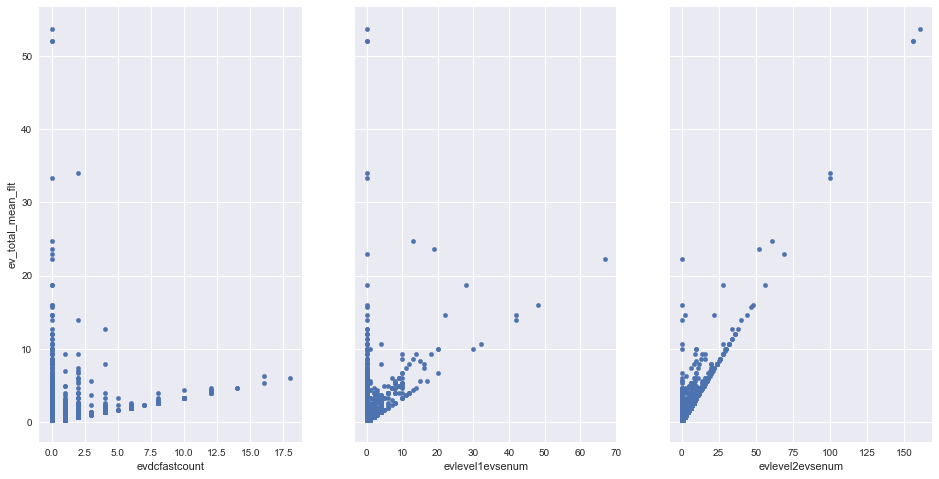

In [121]:
fig, axs = plt.subplots(1, 3, sharey=True)
df_final.plot(kind='scatter', x='evdcfastcount', y='ev_total_mean_flt', ax=axs[0], figsize=(16, 8))
df_final.plot(kind='scatter', x='evlevel1evsenum', y='ev_total_mean_flt', ax=axs[1])
df_final.plot(kind='scatter', x='evlevel2evsenum', y='ev_total_mean_flt', ax=axs[2])

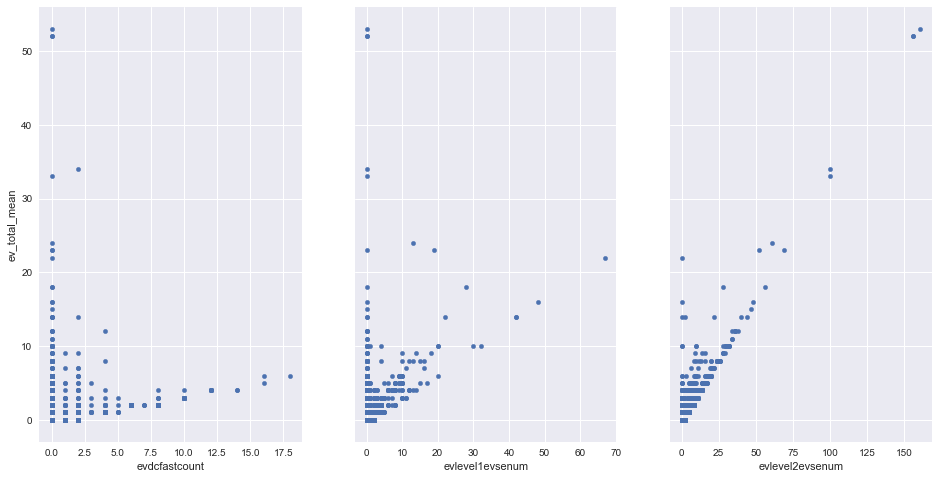

In [122]:
fig, axs = plt.subplots(1, 3, sharey=True)
df_final.plot(kind='scatter', x='evdcfastcount', y='ev_total_mean', ax=axs[0], figsize=(16, 8))
df_final.plot(kind='scatter', x='evlevel1evsenum', y='ev_total_mean', ax=axs[1])
df_final.plot(kind='scatter', x='evlevel2evsenum', y='ev_total_mean', ax=axs[2])

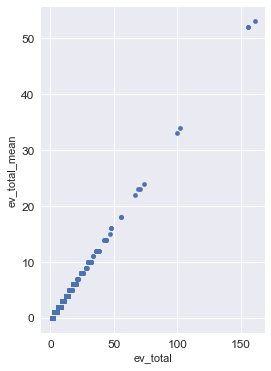

In [48]:
df_final.plot(x='ev_total',y='ev_total_mean',kind='scatter', figsize=(4,6), fontsize=12)

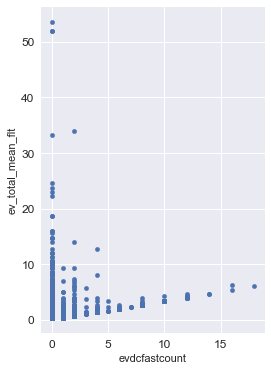

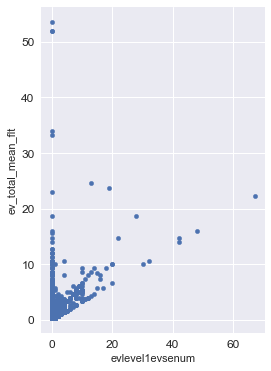

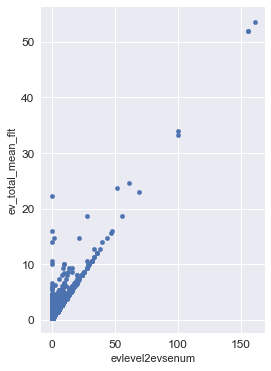

In [120]:
# id / zip / date / ev_total
df_final.plot(x='evdcfastcount',y='ev_total_mean_flt',kind='scatter', figsize=(4,6), fontsize=12)
df_final.plot(x='evlevel1evsenum',y='ev_total_mean_flt',kind='scatter', figsize=(4,6), fontsize=12)
df_final.plot(x='evlevel2evsenum',y='ev_total_mean_flt',kind='scatter', figsize=(4,6), fontsize=12)

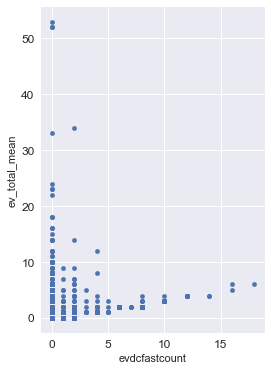

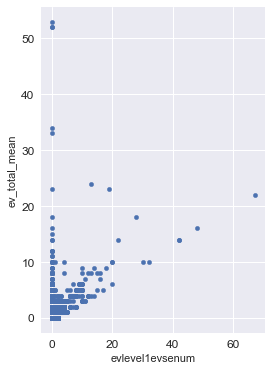

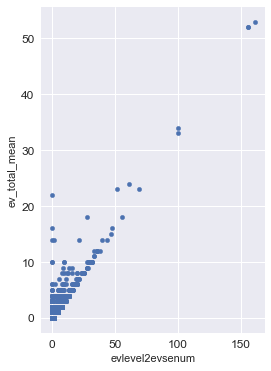

In [44]:
df_final.plot(x='evdcfastcount',y='ev_total_mean',kind='scatter', figsize=(4,6), fontsize=12)
df_final.plot(x='evlevel1evsenum',y='ev_total_mean',kind='scatter', figsize=(4,6), fontsize=12)
df_final.plot(x='evlevel2evsenum',y='ev_total_mean',kind='scatter', figsize=(4,6), fontsize=12)

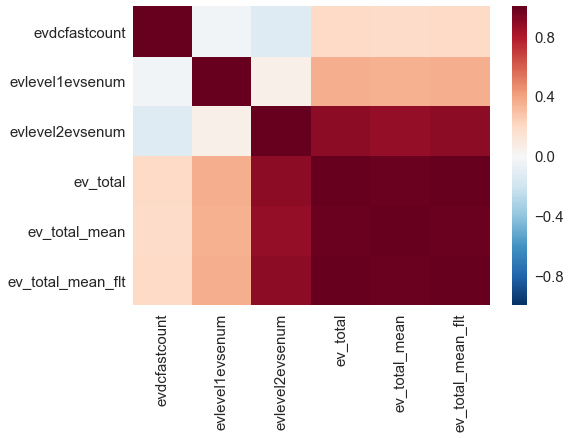

In [306]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(df_final.corr())
sns.set(font_scale = 2)

In [ ]:
# Tested coefficients, best with ev_total_mean

#### Model Build

In [ ]:
# simple model pred
# 0.88388778,   1.22209373,  14.52117853, 2.23671156, 2.23671156,   2.23671156

In [ ]:
# k-folds pred
# 2.26101423,  1.572451  , -0.14895705, 2.23671156, 2.23671156,  2.23671156])

In [ ]:
# holdout pred
# 1.56307093, -0.13030667,  2.93577118, 0.21087392, 0.54806887,  0.21087392

In [ ]:
# Grid Search
# best positive > 1.29206607478e-26
# best negative > -1.29206607478e-26

In [ ]:
~~~ OLS ~~~
# OLS MSE: 1.50578748205746e-29)
# OLS R2: 1.0)
~~~ Lasso ~~~
# Lasso MSE: 1.2043941989012539)
# Lasso R2: 0.88605520527553772)
~~~ Ridge ~~~
# Ridge MSE: 3.0612476896618743e-07)
# Ridge R2: 0.99999997103828286)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
from math import sqrt

In [31]:
# create X and y
feature_cols = ['evdcfastcount', 'evlevel1evsenum', 'evlevel2evsenum']
X = df_final[feature_cols]
y = df_final.ev_total_mean

# instantiate, fit
lr = LinearRegression()
lr.fit(X, y)

# print coefficients
zip(feature_cols, lr.coef_)

[('evdcfastcount', 0.33903838568908706),
 ('evlevel1evsenum', 0.33976444803404893),
 ('evlevel2evsenum', 0.34229494666627386)]

In [32]:
# calculate the R-squared
lr.score(X, y)

0.96949199547510656

In [34]:
lr.predict(X)

array([  0.89079906,   1.22658089,  14.52692596, ...,   2.23392636,
         2.23392636,   2.23392636])

In [ ]:
lr.predict(y).mean()

In [276]:
y.mean()

0.4403813174619187

In [152]:
from sklearn.model_selection import train_test_split

In [185]:
# Training setup, with random state
training_data,holdout = train_test_split(df_final,test_size=0.10,random_state=123)

In [186]:
# KFold setup
n = training_data.shape[0]
kf = KFold(X.shape[0],n_folds=6,random_state=1)

In [187]:
# Create model
lr_model = LinearRegression()

In [188]:
MAE_score = []
MSE_score = []
R2_scores = []
RMSE_score = []

# Use K-Folds cross validation to train your model / kfolds loop (define scores in the loop)
# Fill-in the kfolds-loop:
# use iloc with scikit

for train_index, test_index in kf:
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_true = y.iloc[train_index], y.iloc[test_index] 
    
    # Fit your model on your training x and training y
    lr_model.fit(x_train,y_train)
    y_preds = lr_model.predict(x_test)
    
    fold_score1 = mean_squared_error(y_true,y_preds)
    MSE_score.append(fold_score1)
    
    fold_score2 = mean_absolute_error(y_true,y_preds)
    MAE_score.append(fold_score2)
    
    fold_score3 = r2_score(y_true,y_preds)
    R2_scores.append(fold_score3)
    
    fold_score4 = sqrt(mean_squared_error(y_true,y_preds))
    RMSE_score.append(fold_score4)

In [285]:
lr.predict(x_test)

array([ 2.26101423,  1.572451  , -0.14895705, ...,  2.23671156,
        2.23671156,  2.23671156])

In [ ]:
plt.lr_pred

In [189]:
y_preds.mean()

0.5289915148326666

In [218]:
y_true.mean()

0.5030266343825666

In [274]:
x_test.mean()

evdcfastcount      0.233959
evlevel1evsenum    0.058717
evlevel2evsenum    2.642554
dtype: float64

In [277]:
# mean squared error
MSE_score

[0.044681426262076558,
 0.046008993418147952,
 0.05107036328417805,
 0.046984171051278195,
 0.051715921434224668,
 0.052200563887612468]

In [278]:
# mean absolute error
MAE_score

[0.18974411402533758,
 0.19384243284762723,
 0.20515313987121425,
 0.19616681197476199,
 0.20678121809633174,
 0.20792730317533351]

In [279]:
# root squared mean error
RMSE_score

[0.21137981517182894,
 0.21449707088477443,
 0.22598752904569325,
 0.2167583240645632,
 0.22741134851678943,
 0.22847442720710007]

In [193]:
# root squared
R2_scores

[0.97649791697844335,
 0.978459085107662,
 0.9448381050095116,
 0.9581110960609952,
 0.97642356624769611,
 0.95677394201017418]

In [194]:
lr_model.score(X, y)

0.9694605776366868

In [195]:
# normalize view
lr_model.intercept_

-0.47035039760769565

In [284]:
list(lr_model.predict(x_test)[0:5]) 

[2.2545468639751931,
 1.5733225485794706,
 -0.12973823990983457,
 -0.12973823990983457,
 0.20745671135141258]

In [ ]:
# Holdout Testing

In [286]:
# Training setup
training_data = holdout

In [ ]:
holdout.head(1)

In [3]:
X = holdout[feature_cols]
y = holdout.ev_total_mean

NameError: name 'holdout' is not defined

In [290]:
lr_model.predict(X)

array([ 1.56307093, -0.13030667,  2.93577118, ...,  0.21087392,
        0.54806887,  0.21087392])

In [ ]:
Grid Search

In [298]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error')

gs.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [294]:
print(gs.best_score_)

-1.29206607478e-26


In [295]:
print(-gs.best_score_)

1.29206607478e-26


In [296]:
print(gs.best_estimator_)

Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [300]:
lm = linear_model.LinearRegression().fit(X, y)
print("~~~ OLS ~~~")
print('OLS MSE: ', metrics.mean_squared_error(y, lm.predict(X)))
print('OLS R2:', lm.score(X, y))

lm = linear_model.Lasso().fit(X, y)
print("~~~ Lasso ~~~")
print('Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(X)))
print('Lasso R2:', lm.score(X, y))

lm = linear_model.Ridge().fit(X, y)
print("~~~ Ridge ~~~")
print('Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(X)))
print('Ridge R2:', lm.score(X, y))

~~~ OLS ~~~
('OLS MSE: ', 1.50578748205746e-29)
('OLS R2:', 1.0)
~~~ Lasso ~~~
('Lasso MSE: ', 1.2043941989012539)
('Lasso R2:', 0.88605520527553772)
~~~ Ridge ~~~
('Ridge MSE: ', 3.0612476896618743e-07)
('Ridge R2:', 0.99999997103828286)


In [315]:
# create X and y
feature_cols = ['evdcfastcount']
X = df_final[feature_cols]
y = df_final.ev_total_mean

# instantiate, fit
lr = LinearRegression()
lr.fit(X, y)

# print coefficients
zip(feature_cols, lr.coef_)

[('evdcfastcount', 0.2022868039030801)]

In [316]:
# Fast charger (looking strong)
lr.predict(X)

array([ 0.37593849,  0.7805121 ,  0.37593849, ...,  1.99423292,
        1.99423292,  1.99423292])

In [318]:
# create X and y
feature_cols = ['evlevel1evsenum']
X = df_final[feature_cols]
y = df_final.ev_total_mean

# instantiate, fit
lr = LinearRegression()
lr.fit(X, y)

# print coefficients
zip(feature_cols, lr.coef_)

[('evlevel1evsenum', 0.38323903669674492)]

In [319]:
# Simple 110 outlet (dying out)
lr.predict(X)

array([ 0.37639861,  0.37639861,  8.80765741, ...,  0.37639861,
        0.37639861,  0.37639861])

In [320]:
# create X and y
feature_cols = ['evlevel2evsenum']
X = df_final[feature_cols]
y = df_final.ev_total_mean

# instantiate, fit
lr = LinearRegression()
lr.fit(X, y)

# print coefficients
zip(feature_cols, lr.coef_)

[('evlevel2evsenum', 0.33297365580972665)]

In [321]:
# Simple J1772 220 outlet (not looking too strong)
lr.predict(X)

array([ 1.03877995,  0.7058063 ,  7.03230576, ..., -0.29311467,
       -0.29311467, -0.29311467])